In [134]:
print("Hello World!")

Hello World!


In [135]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

# def sphere_points_generator(N, dim=3):
#     norm = np.random.normal
#     normal_deviates = norm(size=(dim, N))
#     radius = np.sqrt((normal_deviates**2).sum(axis=0))
#     points = normal_deviates/radius
#     return points.T

If Y is drawn from the uncorrelated multivariate normal distribution, then S = Y / ||Y|| has the uniform distribution on the unit d-sphere. Multiplying S by U1/d, where U has the uniform distribution on the unit interval (0,1), creates the uniform distribution in the unit d-dimensional ball.

In [136]:
#https://blogs.sas.com/content/iml/2016/04/06/generate-points-uniformly-in-ball.html
def ball_points_generator(dim, N, radius):
    # Generowanie macierzy zmiennych losowych o rozkładzie normalnym standardowym
    xi = np.random.normal(size=(dim, N))

    # obliczanie normy
    norm = np.linalg.norm(xi, axis=0)

    S = xi / norm
    U = np.random.uniform(low=0.0, high=1.0, size=N)
    S = S * np.power(U, 1/dim)
    points = S * radius

    # Transponowanie macierzy punktów
    # points = scaled_xi.T

    return points.T

In [137]:
def sphere_points_generator(dim, N, radius):
    # Generowanie macierzy zmiennych losowych o rozkładzie normalnym standardowym
    xi = np.random.normal(size=(dim, N))

    # Obliczanie sumy kwadratów zmiennych losowych dla każdego punktu
    sum_of_squares = np.sum(xi**2, axis=0)

    # Obliczanie wartości λ na podstawie żądanej wartości
    lambda_squared = radius**2

    # Skalowanie zmiennych losowych dla każdego punktu, aby uzyskać żądaną wartość λ
    scaled_xi = xi * np.sqrt(lambda_squared / sum_of_squares)

    # Transponowanie macierzy punktów
    # unit_vectors = scaled_xi.T

    # return unit_vecto
    return scaled_xi.T

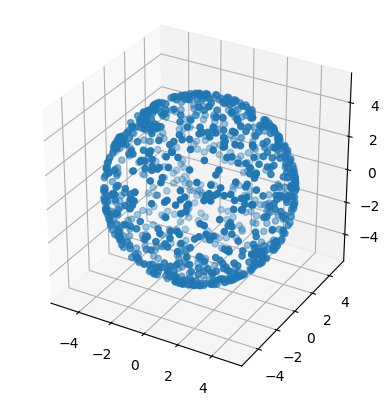

In [138]:
points = sphere_points_generator(3,1000, 5)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.scatter(*points.T)
ax.set_aspect('equal')
plt.show()

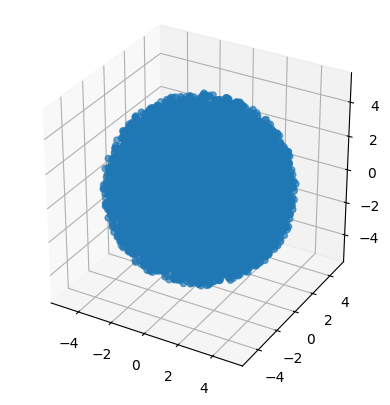

In [139]:
points = ball_points_generator(3,10000,5)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.scatter(*points.T)
ax.set_aspect('equal')
plt.show()

In [140]:
from sklearn.manifold import TSNE
from umap import UMAP
from trimap import TRIMAP
from pacmap import PaCMAP

def TSNE_reduce(data):
    tsne = TSNE()
    return tsne.fit_transform(data)

def Umap_reduce(data):
    umap = UMAP()
    return umap.fit_transform(data)

def Trimap_reduce(data):
    trimap = TRIMAP()
    return trimap.fit_transform(data)

def Pacmap_reduce(data):
    pacmap = PaCMAP()
    return pacmap.fit_transform(data)

def IVHD_reduce(data):
    ...

def embeded_visualization(data, title):
    # rozbicie punktów na współrzędne x, y, z
    x = data[:, 0]
    y = data[:, 1]

    fig, ax = plt.subplots()
    # wygenerowanie wykresu punktów
    ax.scatter(x, y, c='green')

    plt.title(f"{title} Visualization")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")

    # wyświetlenie wykresu
    plt.show()

def embeded_visualization_two_clases(data, N, title):
    # rozbicie punktów na współrzędne x, y, z
    x = data[:N, 0]
    y = data[:N, 1]

    x1 = data[N:2*N, 0]
    y1 = data[N:2*N, 1]

    fig, ax = plt.subplots()
    # wygenerowanie wykresu punktów
    ax.scatter(x, y, c='green')
    ax.scatter(x1, y1, c='blue')

    plt.title(f"{title} Visualization")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")

    # wyświetlenie wykresu
    plt.show()

def embeded_visualization_three_clases(data, N, title):
    # rozbicie punktów na współrzędne x, y, z
    x = data[:N, 0]
    y = data[:N, 1]

    x1 = data[N:2*N, 0]
    y1 = data[N:2*N, 1]

    x2 = data[2*N:, 0]
    y2 = data[2*N:, 1]

    fig, ax = plt.subplots()
    # wygenerowanie wykresu punktów
    ax.scatter(x, y, c='green')
    ax.scatter(x1, y1, c='blue')
    ax.scatter(x2, y2, c='red')

    plt.title(f"{title} Visualization")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")

    # wyświetlenie wykresu
    plt.show()

# Sphere and ball inside

In [141]:
sphere_points = sphere_points_generator(3, 1000, 7)
ball_points = ball_points_generator(3, 1000, 2)

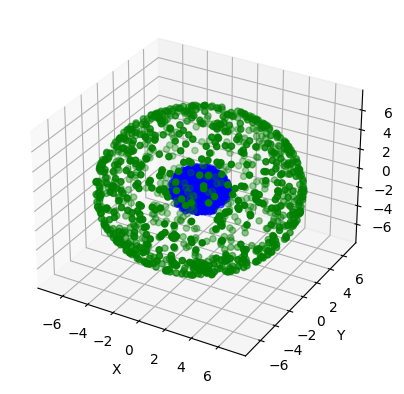

In [191]:
# rozbicie punktów na współrzędne x, y, z
x = [point[0] for point in sphere_points]
y = [point[1] for point in sphere_points]
z = [point[2] for point in sphere_points]

x1 = [point[0] for point in ball_points]
y1 = [point[1] for point in ball_points]
z1 = [point[2] for point in ball_points]

# utworzenie figury 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# wygenerowanie wykresu punktów
ax.scatter(x, y, z, c='green')
ax.scatter(x1, y1, z1, c='blue')

# ustawienie etykiet osi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# wyświetlenie wykresu
plt.show()

# 3D to 2D

t-SNE

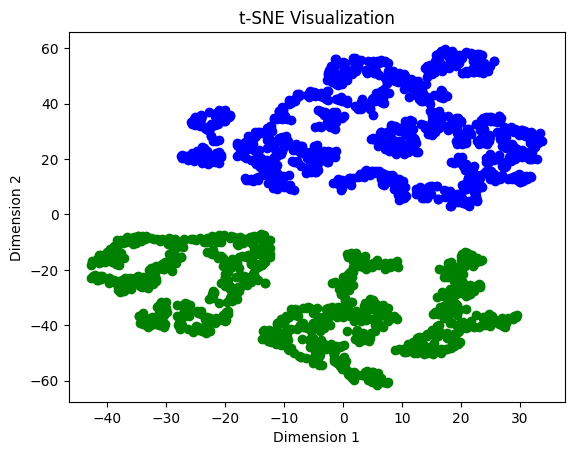

In [183]:
data = np.concatenate((sphere_points, ball_points))
reduced = TSNE_reduce(data)
embeded_visualization_two_clases(reduced,1000,'t-SNE')

Standardowe ustawienia Tsne z sukcesem poradziły sobie z redukcją wymiarowości i odseparowały oby dwie klasy obiektów od siebie

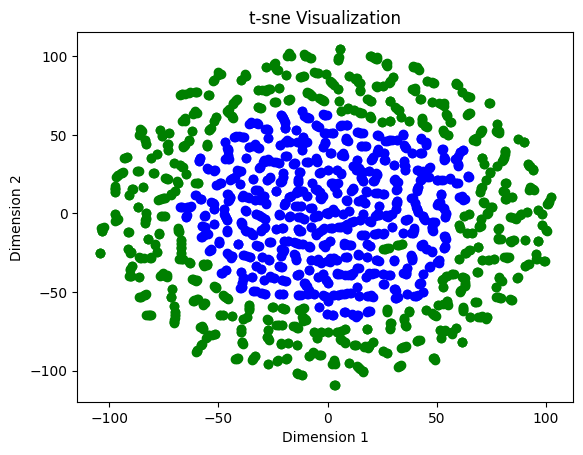

In [184]:
tsne = TSNE(perplexity=2)
transformed = tsne.fit_transform(data)
embeded_visualization_three_clases(transformed, 1000, 't-sne')

Zmana parametru perplexity na 2 pozwoliła na uzyskanie oczekiwanego efektu, a więc separacji zbliżonej do rzutu od góry na przestrzeń 2 wymiarową

UMAP

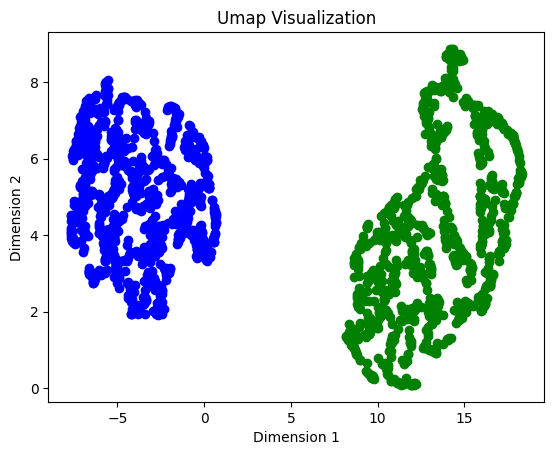

In [185]:
reduced = Umap_reduce(data)
embeded_visualization_two_clases(reduced, 1000, 'Umap')

Standardowe ustawienia Umap również odseprawały od siebie punkty dwóch badanych klas obiektów

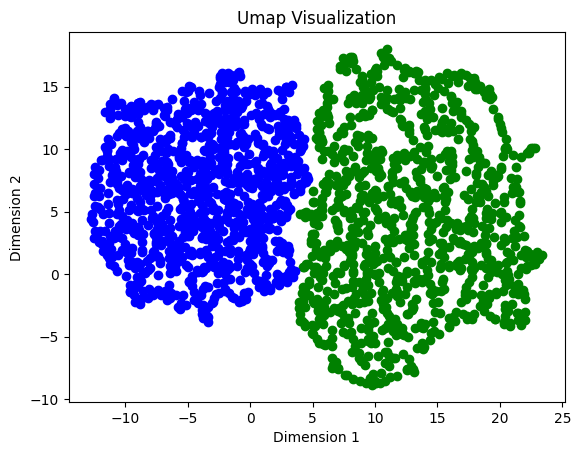

In [186]:
umap = UMAP(n_neighbors=5, min_dist=0.99)
transformed = umap.fit_transform(data)
embeded_visualization_three_clases(transformed, 1000, 'Umap')

Testowanie różnych parametrów UMAP nie przyniosło oczekiwanych rezultatów. [TO JESZCZE MOŻNA SPRAWDZIĆ]

TriMAP

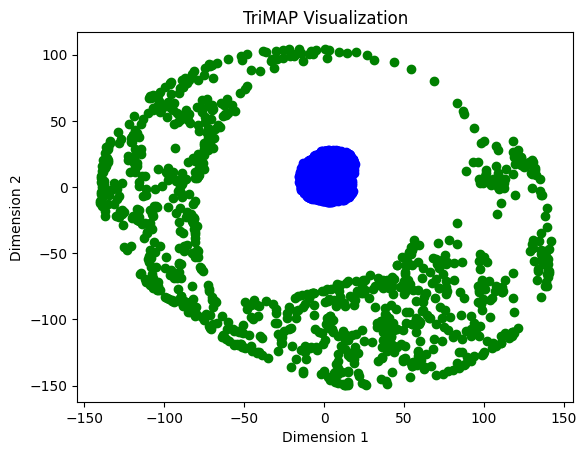

In [187]:
reduced = Trimap_reduce(data)
embeded_visualization_two_clases(reduced, 1000, 'TriMAP')

Standardowe ustawienia TriMAP są w stanie od razu uzyskać oczekiwany rezultat. Na wykresie można zauwarzyć dobre dopasowanie zarówno w aspekcie lokalnym jak i globalnym. Co ciekawe zauwarzono, że kolejne uruchomienia algorytmu dają różne wyniki, co sprawia, że dopasowanie nie zawsze jest idealne, jednakże za każdym razem dobrze separuje pomiędzy sobą badane klasy obiektów.

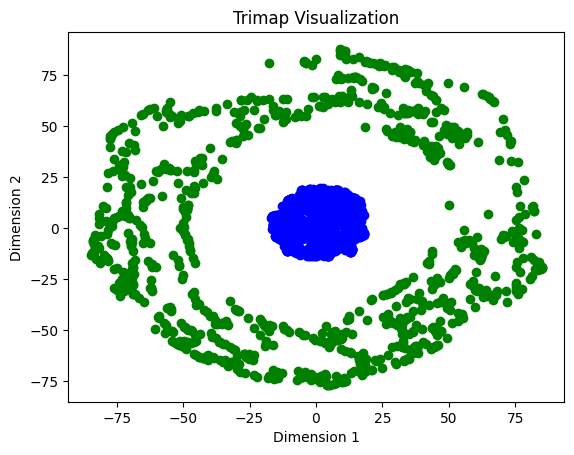

In [188]:
trimap = TRIMAP(n_inliers=5)
transformed = trimap.fit_transform(data)
embeded_visualization_three_clases(transformed, 1000, 'Trimap')

PaCMAP

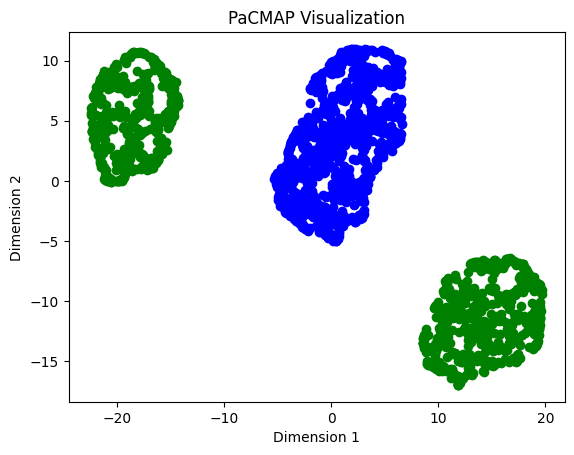

In [189]:
reduced = Pacmap_reduce(data)
embeded_visualization_two_clases(reduced, 1000, 'PaCMAP')

Standardowe ustawienia PaCMAP poprawnie odseparowały tylko kulę. Sfera została podzielona na dwie grupy. Może to wynikać z źle dobranych parametrów.

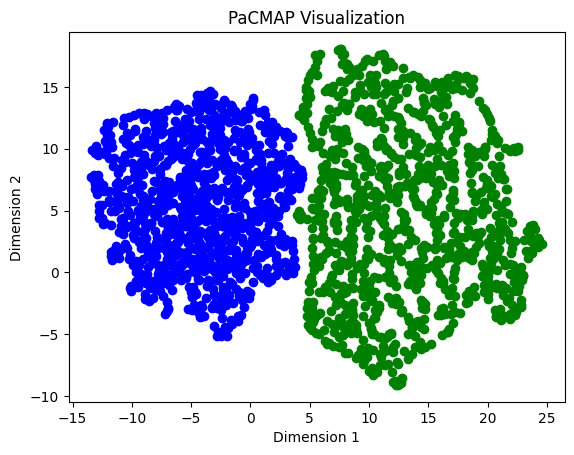

In [190]:
pacmap = PaCMAP(n_neighbors=2)
transformed = umap.fit_transform(data)
embeded_visualization_three_clases(transformed, 1000, 'PaCMAP')

Zmiana parametru n_neighbors pozwoliła na dokładne odseparowanie dwóch klas obiektów. Jednakże wciąż nie uzyskano oczekiwanego efektu.  [MOŻNA POBAWIĆ SIĘ PARAMETRAMI]

IVHD

# Two sphere and ball inside

In [164]:
sphere_points = sphere_points_generator(3, 1000, 7)
sphere_points2 = sphere_points_generator(3, 1000, 10)
ball_points = ball_points_generator(3, 1000, 2)

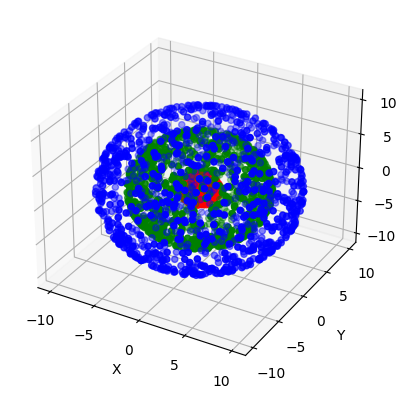

In [178]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# rozbicie punktów na współrzędne x, y, z
x = [point[0] for point in sphere_points]
y = [point[1] for point in sphere_points]
z = [point[2] for point in sphere_points]

x1 = [point[0] for point in ball_points]
y1 = [point[1] for point in ball_points]
z1 = [point[2] for point in ball_points]

x2 = [point[0] for point in sphere_points2]
y2 = [point[1] for point in sphere_points2]
z2 = [point[2] for point in sphere_points2]

# utworzenie figury 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# wygenerowanie wykresu punktów
ax.scatter(x, y, z, c='green')
ax.scatter(x1, y1, z1, c='red')
ax.scatter(x2, y2, z2, c='blue')

# ustawienie etykiet osi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# wyświetlenie wykresu
plt.show()

In [166]:
data = np.concatenate((sphere_points, sphere_points2, ball_points))

t-SNE

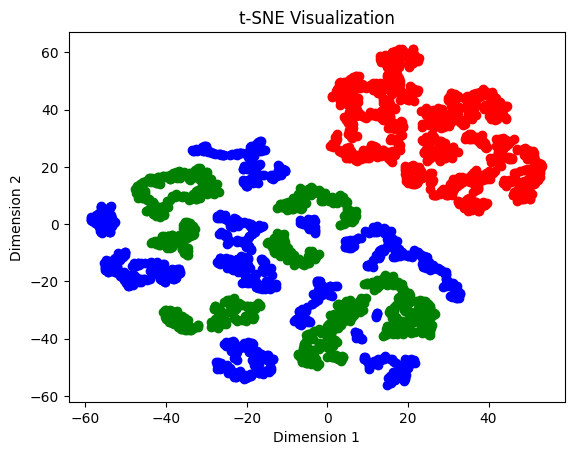

In [167]:
reduced = TSNE_reduce(data)
embeded_visualization_three_clases(reduced, 1000, 't-SNE')

Standardowe parametry t-sne poprawnie odseparowały tylko kulę, natomiast miały problem z separacją sfer.

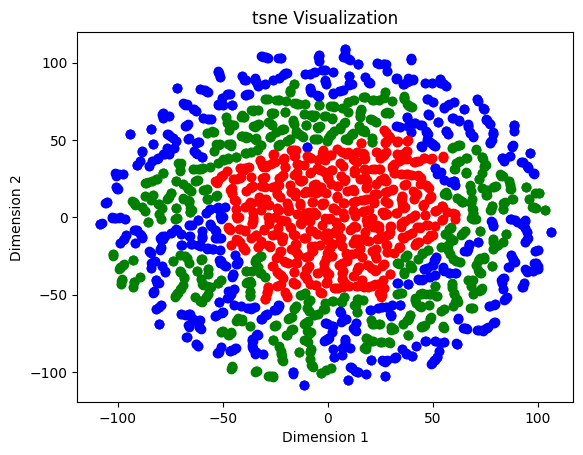

In [171]:
tsne = TSNE(perplexity=2)
transformed = tsne.fit_transform(data)
embeded_visualization_three_clases(transformed, 1000, 'tsne')

Zmniejszenie parametru perplexity pozwoliło na uzyskanie w miarę zbliżonego efektu do oczekiwanego. Jendakże możemy zuwarzyć problemy z separacją sfer pomiędzy sobą

UMAP

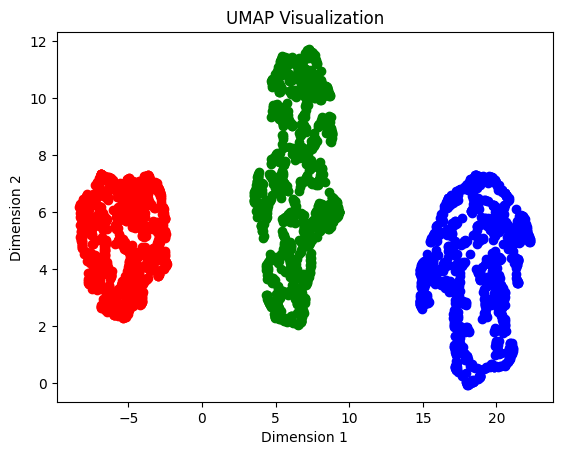

In [110]:
reduced = Umap_reduce(data)
embeded_visualization_three_clases(reduced, 1000, 'UMAP')

Standardowe parametry UMAP, poradziły sobie ze skutecznym odseparowanie punktów poszczególnych klas obiektów.

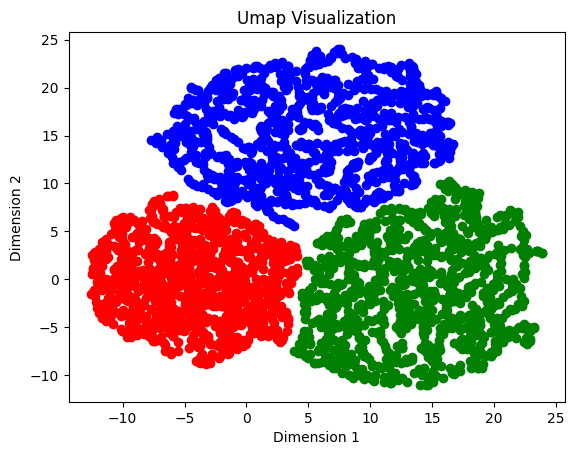

In [176]:
umap = UMAP(n_neighbors=5, min_dist=0.99)
transformed = umap.fit_transform(data)
embeded_visualization_three_clases(transformed, 1000, 'Umap')

Zmiany parametrów nie pozwoliły na uzyskanie oczekiwanego efektu. [MOŻNA SIĘ JESZCZE POBAWIĆ PARAMETRAMI]

TriMAP

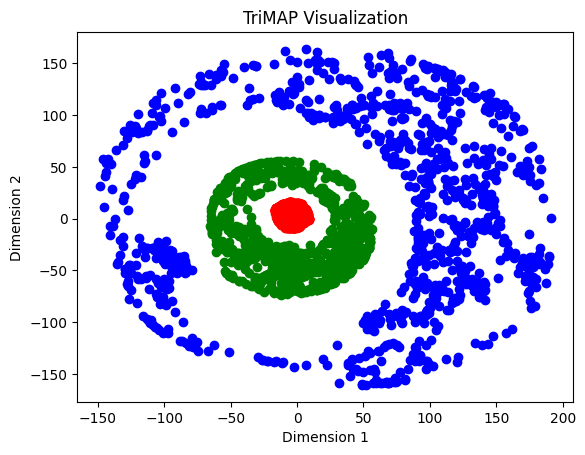

In [177]:
reduced = Trimap_reduce(data)
embeded_visualization_three_clases(reduced, 1000, 'TriMAP')

W Zależności od uruchomienia standardowe parametry TriMAP są w stanie bardzo dobrze poradzić sobie z redukcją wymiarowości uzyskując przy tym zamierzony efekt.

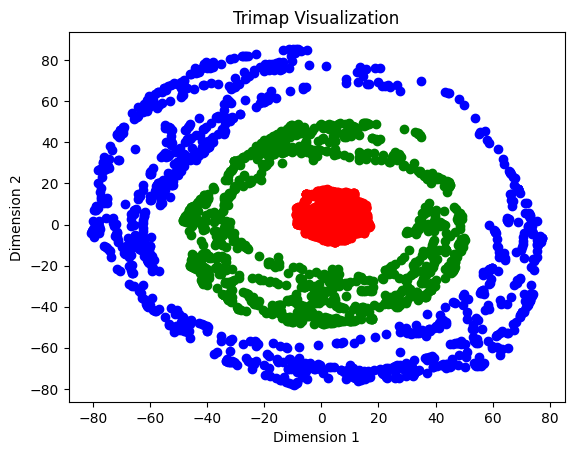

In [179]:
trimap = TRIMAP(n_inliers=5)
transformed = trimap.fit_transform(data)
embeded_visualization_three_clases(transformed, 1000, 'Trimap')

PaCMAP

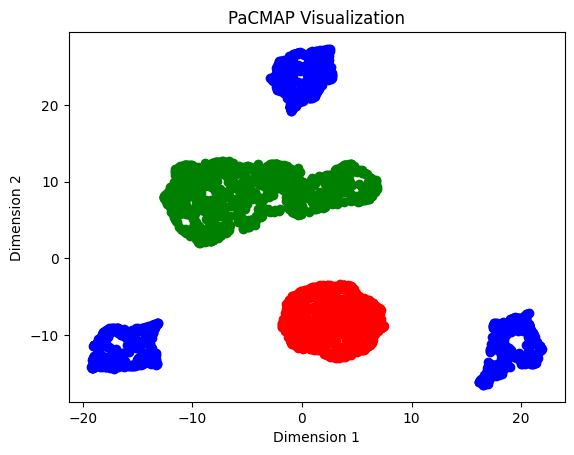

In [113]:
reduced = Pacmap_reduce(data)
embeded_visualization_three_clases(reduced, 1000, 'PaCMAP')

Standardowe parametry Trimap napotykają problemy w poprawnym odseparowaniu klas obiektów.
Jedna ze sfer została podzielona na trzy części. Być może była tu próba przedstawienia redukcji w oczekiwany sposób (rzut od góry na przestrzeń 2 wymiarową, jeżeli tak to całkiem nie udana.

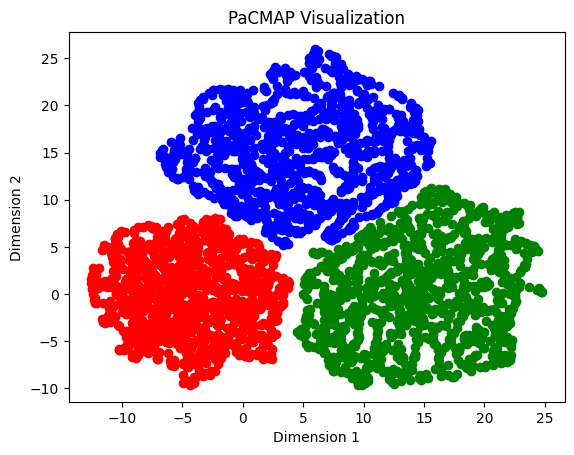

In [182]:
pacmap = PaCMAP(n_neighbors=2)
transformed = umap.fit_transform(data)
embeded_visualization_three_clases(transformed, 1000, 'PaCMAP')

Zmiana parametrów n-neighbors pozowliła na skuteczne odseparwoanie od siebie różnych klas obietków, jednakże wciąż bez oczekiwanych rezultatów. [MOŻNA POBAWIĆ SIĘ JESZCZE PARAMETRAMI]

IVHD

# Wnioski
[Wnioski po redukcji z 3 wymiarów do 2 na kuli i sferach, brak metody IVHD]
Można zauważyć, że w badanych przykładach najlepiej wypada TriMAP. Nawet z podstawowymi ustawieniami jest w stanie uzyskać oczekiwany efekt. W przypadku kuli i jednej sfery każda poza PacMAP z metod przy podstawowych ustawieniach poprawnie odseparowała od siebie obie klasy obiektów. W przypadku PacMAP konieczna była zmiana parametrów. [DODAĆ WIOSKI ZE ZMIAN PARAMETRÓW CZY UZYSKIWANE SĄ OCZEKIWANE REZULTATY (np. tsne - tak)]
Większe problemy na standarowych ustawieniach można było zaobserwować w przypadku kuli i 2 sfer. Tsne oraz PacMap wymagały, poprawy parametrów. Co ciekawe t-sne mimo zmianionych parametrów wciąż niezbyd dobrze odseprawowało sfery od siebie, choć uzyskano wynik zblożony do oczekiwanego.

# TODO

* generacja punktów torusa
* sprawdzenie ivhd
* redukcja z większej ilości wymiarów
* wymyślenie jakiś innych kombinacji obiektów ??
* sprawdzenie miarami ?? nie wiem czy konieczne
* przetestowanie na zbiorze RsCV Reuter for fun:)

# TESTY

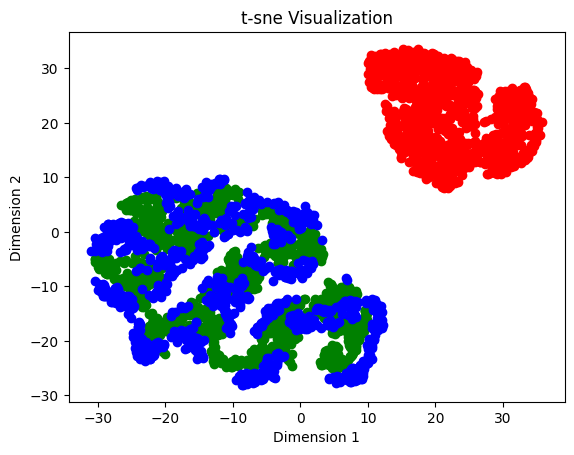

In [118]:
tsne = TSNE(perplexity=100)
transformed = tsne.fit_transform(data)
embeded_visualization_three_clases(transformed, 1000, 't-sne')

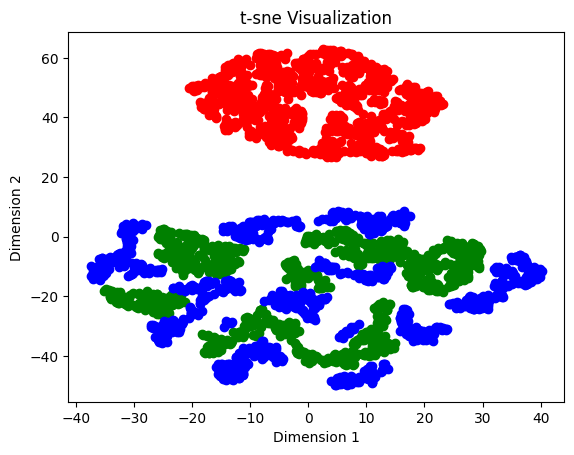

In [114]:

tsne = TSNE(perplexity=50)
transformed = tsne.fit_transform(data)
embeded_visualization_three_clases(transformed, 1000, 't-sne')


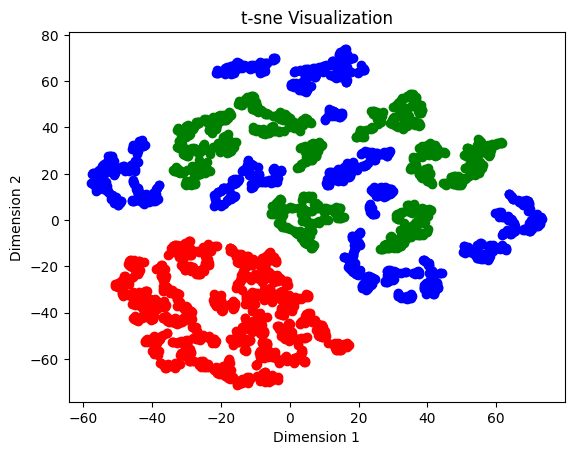

In [115]:
tsne = TSNE(perplexity=20)
transformed = tsne.fit_transform(data)
embeded_visualization_three_clases(transformed, 1000, 't-sne')

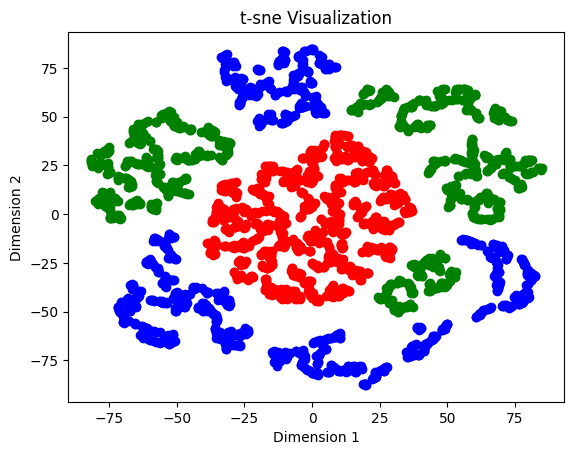

In [116]:
tsne = TSNE(perplexity=10)
transformed = tsne.fit_transform(data)
embeded_visualization_three_clases(transformed, 1000, 't-sne')

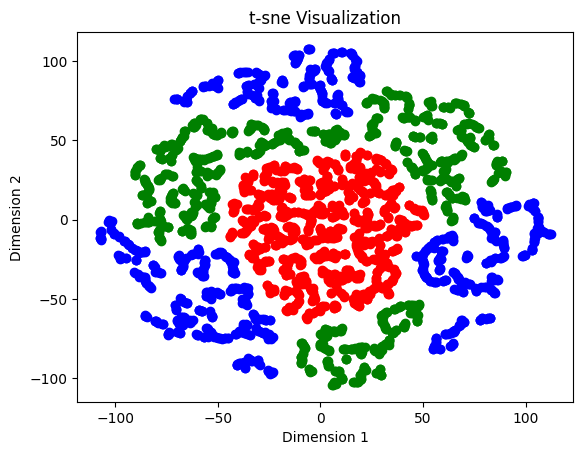

In [117]:
tsne = TSNE(perplexity=5)
transformed = tsne.fit_transform(data)
embeded_visualization_three_clases(transformed, 1000, 't-sne')

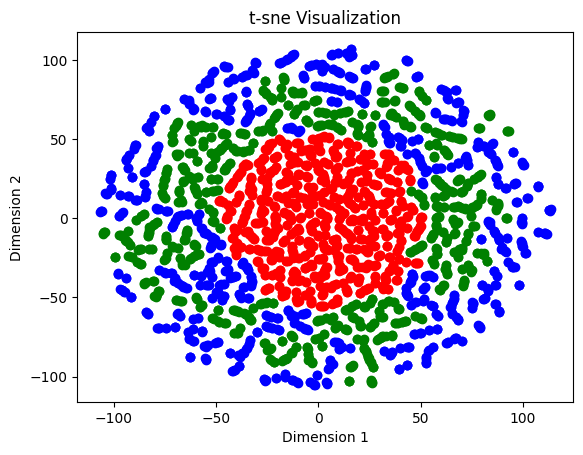

In [119]:
tsne = TSNE(perplexity=2)
transformed = tsne.fit_transform(data)
embeded_visualization_three_clases(transformed, 1000, 't-sne')